In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path
from matplotlib.lines import Line2D
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from uncertainties import ufloat, unumpy
from scipy.odr import ODR, Model, Data, RealData
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
from sympy import symbols, Eq, solve
from scipy.integrate import quad

## Hausaufgabe

In [10]:
a, b, V, nu, p, R, T = symbols('a b V nu p R T')
eq = Eq((p+((nu**2)*a)/V**2)*(V-nu*b),nu*R*T)
res = solve(eq, p)
eq

Eq((V - b*nu)*(p + a*nu**2/V**2), R*T*nu)

In [11]:
a = 3.6e-1#(Pa * m6)/mol2
b = 4.3e-5 #m3/mol
nu = 1
T = 288.7
R = constants.R
print(R)

8.314462618


In [12]:
def iso_288(v):
    return ((R*T)/(v-b))-(a/(v**2))

In [13]:
V = np.linspace(1, 500, 10000)
p = (((R*T)/(V * 1e-6 -b))-(a/((V*1e-6)**2))) * 1e-5

(55.0, 80.0)

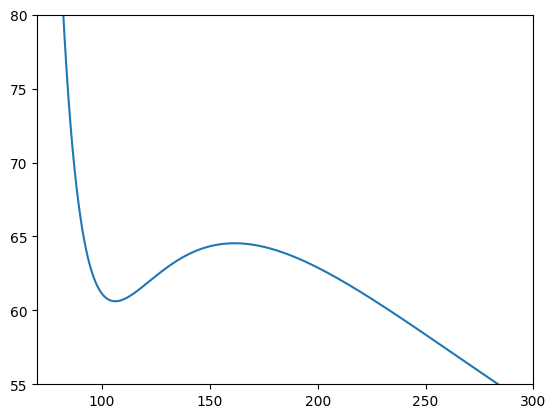

In [14]:
fig, ax = plt.subplots(dpi=100)
plt.plot(V, p)
ax.set_xlim(70, 300)
ax.set_ylim(55, 80)


In [15]:
file_path1 = '/Users/danielmiksch/Downloads/C31_30_8.csv'
file_path2 = '/Users/danielmiksch/Downloads/C31_35_8.csv'
# file_path3 = '/Users/danielmiksch/Downloads/C42_3.csv'
# file_path14 = '/Users/danielmiksch/Downloads/C42_3.csv'


data_30_8 = pd.read_csv(file_path1, sep=',')
data_35_8 = pd.read_csv(file_path2, sep=',')

In [16]:
np.set_printoptions(suppress=True, precision=10)
data_30_8 = data_30_8.to_numpy()
data_35_8 = data_35_8.to_numpy()